---
# 1. 데이터셋 불러오기
---

In [ ]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

---
### 1-1 단어 전체 불러오기
---

In [ ]:
(x_train_all, y_train_all), (x_test_all, y_test_all) = reuters.load_data(num_words=None, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
print('훈련 샘플의 수: {}'.format(len(x_train_all)))
print('테스트 샘플의 수: {}'.format(len(x_test_all)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [ ]:
num_classes = max(y_train_all) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


---
### 1-2 데이터셋 10000개 불러오기
---

In [ ]:
(x_train_10, y_train_10), (x_test_10, y_test_10) = reuters.load_data(num_words=10000, test_split=0.2)

---
### 1-3 데이터셋 5000개 불러오기
---

In [ ]:
(x_train_5, y_train_5), (x_test_5, y_test_5) = reuters.load_data(num_words=5000, test_split=0.2)

In [ ]:
print('num_word = None')
print(len(x_train_all))
print(len(x_test_all))
print('='*30)
print('num_word = 10000')
print(len(x_train_10))
print(len(x_test_10))
print('='*30)
print('num_word = 5000')
print(len(x_train_5))
print(len(x_test_5))


num_word = None
8982
2246
num_word = 10000
8982
2246
num_word = 5000
8982
2246


---
# 2. 복원을 위한 index_to_word 생성
---

In [ ]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

565248/550378 [==============================] - 0s 0us/step


In [ ]:
index_to_word = { index+3 : word for word, index in word_index.items() }

In [ ]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

- 전체 단어장 개수 확인

In [ ]:
len(index_to_word)

30982

In [ ]:
print(' '.join([index_to_word[index] for index in x_train_all[7502]]))

<sos> the united states' dependency on foreign oil sources may reach record levels by the mid 1990s according to john h lichtblau president of petroleum industry research associates lichtblau speaking at an alternative energy conference here said the u s may depend on foreign suppliers for as much as 52 pct of its oil by 1995 surpasssing the previous high level of 47 pct in 1977 the long term growth in dependency on foreign oil is inevitable lichtblau said as much as 30 pct of u s oil imports in 1995 could come from opec nations he said lichtblau said the u s depended on foreign suppliers for 33 pct of its oil in 1986 and predicted that would increase to 40 pct by 1990 however the rate of this growth can be affected positively or negatively through government action or inaction lichtblau said he said that one of the government's negative actions is the maintenance of the windfall profits tax which acts as a disincentive to developing existing fields and reduces cash flow for oil explor

- 단어 사전값 별 문장에서 UNK = 2가 차이가 있는지 확인

In [ ]:
print(x_train_all[8981])
print(x_train_10[8981])
print(x_train_5[8981])

[1, 227, 2406, 91, 21969, 125, 2855, 21, 4, 3976, 76, 7, 4, 757, 481, 3976, 790, 5259, 5654, 9, 111, 149, 8, 7, 10, 76, 223, 51, 4, 417, 8, 1047, 91, 6917, 1688, 340, 7, 194, 9411, 6, 1894, 21, 127, 2151, 2394, 1456, 6, 3034, 4, 329, 433, 7, 65, 87, 1127, 10, 8219, 1475, 290, 9, 21, 567, 16, 1926, 24, 4, 76, 209, 30, 4033, 6655, 5654, 8, 4, 60, 8, 4, 966, 308, 40, 2575, 129, 15562, 295, 277, 1071, 9, 24, 286, 2114, 234, 222, 9, 4, 906, 3994, 8519, 114, 5758, 1752, 7, 4, 113, 17, 12]
[1, 227, 2406, 91, 2, 125, 2855, 21, 4, 3976, 76, 7, 4, 757, 481, 3976, 790, 5259, 5654, 9, 111, 149, 8, 7, 10, 76, 223, 51, 4, 417, 8, 1047, 91, 6917, 1688, 340, 7, 194, 9411, 6, 1894, 21, 127, 2151, 2394, 1456, 6, 3034, 4, 329, 433, 7, 65, 87, 1127, 10, 8219, 1475, 290, 9, 21, 567, 16, 1926, 24, 4, 76, 209, 30, 4033, 6655, 5654, 8, 4, 60, 8, 4, 966, 308, 40, 2575, 129, 2, 295, 277, 1071, 9, 24, 286, 2114, 234, 222, 9, 4, 906, 3994, 8519, 114, 5758, 1752, 7, 4, 113, 17, 12]
[1, 227, 2406, 91, 2, 125, 2855,

- 복원을 위한 함수 생성

In [ ]:
def data_restore(x_train):
  decoded = []
  for i in range(len(x_train)):
      t = ' '.join([index_to_word[index] for index in x_train[i]])
      decoded.append(t)
  return decoded

- num_word = None 데이터셋 복원

In [ ]:
x_train_all = data_restore(x_train_all)
x_test_all = data_restore(x_test_all)

- num_word = 10000 데이터셋 복원

In [ ]:
x_train_10 = data_restore(x_train_10)
x_test_10 = data_restore(x_test_10)

- num_word = 5000 데이터셋 복원

In [ ]:
x_train_5 = data_restore(x_train_5)
x_test_5 = data_restore(x_test_5)

- 복원된 데이터셋 확인

In [ ]:
print(x_train_all[:1])
print(x_train_10[:1])
print(x_train_5[:1])

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3']
['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3']
['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company sa

---
# 3. 벡터화
---


train 데이터에는 fit_trasform  
test 데이터에는 transform 사용 

### \<Why?>

- fit_trasform()

우리가 만든 모델은 train data에 있는 mean과 variance를 학습하게 됨  
이렇게 학습된 Scaler()의 parameter는 test data를 scale하는데 사용되며
train data로 학습된 Scaler()의 parameter를 통해 test data의 feature 값들이 스케일 된다.  

- transform()

train data로부터 학습된 mean값과 variance값을 test data에 적용하기 위해 transform() 메서드를 사용
 
- 왜 test data에서는 fit_transform을 사용하지 않는가?🤔

만약에 fit_transform을 test data에도 적용하게 된다면 test data로부터 새로운 mean값과 variance값을 얻게 되는 것  
즉, 우리의 모델이 test data도 학습하게 된다.

test data는 'Surprise'한 데이터 셋인데 이 데이터마저 학습하게 된다면  
우리의 모델이 처음 보는 데이터에 대해서 얼마나 성능이 좋은지 알 수 없게 되는 것  

다시 말해, test data는 모델이 학습된 후에 평가할 때만 사용되어야 하는데  
fit_transform을 test data에도 하게 된다면 모델의 성능을 평가할 수 없게 된다.

출처: https://deepinsight.tistory.com/165

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

- num_word = None 변환

In [ ]:
############################# 학습 데이터 변환 #############################
dtmvector = CountVectorizer()
x_train_dtm_all = dtmvector.fit_transform(x_train_all)

tfidf_transformer = TfidfTransformer()
tfidfv_all = tfidf_transformer.fit_transform(x_train_dtm_all)

############################# 테스트 데이터 변환 #############################
x_test_dtm_all = dtmvector.transform(x_test_all) # 테스트 데이터를 DTM으로 변환
tfidfv_all_test = tfidf_transformer.transform(x_test_dtm_all) # DTM을 TF-IDF 행렬로 변환
print(tfidfv_all.shape)
print('='*50)
print(tfidfv_all_test.shape)

(8982, 26506)
(2246, 26506)


- num_word = 10000 변환

In [ ]:
############################# 학습 데이터 변환 #############################
dtmvector = CountVectorizer()
x_train_dtm_10 = dtmvector.fit_transform(x_train_10)

tfidf_transformer = TfidfTransformer()
tfidfv_10 = tfidf_transformer.fit_transform(x_train_dtm_10)

############################# 테스트 데이터 변환 #############################
x_test_dtm_10 = dtmvector.transform(x_test_10) # 테스트 데이터를 DTM으로 변환
tfidfv_10_test = tfidf_transformer.transform(x_test_dtm_10) # DTM을 TF-IDF 행렬로 변환
print(tfidfv_10.shape)
print('='*50)
print(tfidfv_10_test.shape)

(8982, 9670)
(2246, 9670)


- num_word = 5000 변환

In [ ]:
############################# 학습 데이터 변환 #############################
dtmvector = CountVectorizer()
x_train_dtm_5 = dtmvector.fit_transform(x_train_5)

tfidf_transformer = TfidfTransformer()
tfidfv_5 = tfidf_transformer.fit_transform(x_train_dtm_5)

############################# 테스트 데이터 변환 #############################
x_test_dtm_5 = dtmvector.transform(x_test_5) # 테스트 데이터를 DTM으로 변환
tfidfv_5_test = tfidf_transformer.transform(x_test_dtm_5) # DTM을 TF-IDF 행렬로 변환
print(tfidfv_5.shape)
print('='*50)
print(tfidfv_5_test.shape)

(8982, 4867)
(2246, 4867)


---
# 4. 머신러닝 모델 함수화
---

skicit learn 공식홈페이지 https://scikit-learn.org/stable/index.html

In [ ]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

---
### 4-1 나이브 베이즈 모델 함수화
---

In [ ]:
nb_history = []
def NB(tfidfv,y_train,tfidfv_test,y_test):
  model = MultinomialNB()
  model.fit(tfidfv, y_train)
  predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
  nb_history.append(accuracy_score(y_test, predicted))
  return accuracy_score(y_test, predicted) #예측값과 실제값 비교

---
### 4-2 Complement Naive Bayes Classifier(CNB) 모델 함수화
---

In [ ]:
CNB_history = []
def CNB(tfidfv,y_train,tfidfv_test,y_test):  
  cb = ComplementNB()
  cb.fit(tfidfv, y_train)
  predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
  CNB_history.append(accuracy_score(y_test, predicted))
  return accuracy_score(y_test, predicted) #예측값과 실제값 비교

---
### 4-3 로지스틱 회귀(Logistic Regression) 모델 함수화
---

  - penalty (default = L2) :  L1, L2 제약조건을 설정하는 하이퍼 파라미터 
  - C (default = 1.0) :  정규화 강도의 역수; 양수 부동 소수점이어야 함  
  지원 벡터 머신에서와 같이 값이 작을수록 더 강한 정규화를 지정

In [ ]:
LR_history = []
def LR(tfidfv,y_train,tfidfv_test,y_test):  
  lr = LogisticRegression(C=10000, penalty='l2')
  lr.fit(tfidfv, y_train)
  predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
  LR_history.append(accuracy_score(y_test, predicted))
  return accuracy_score(y_test, predicted) #예측값과 실제값 비교

---
### 4-4 선형 서포트 벡터 머신(Linear Support Vector Machine) 모델 함수화
---

In [ ]:
SVM_history = []
def SVM(tfidfv,y_train,tfidfv_test,y_test):  
  lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
  lsvc.fit(tfidfv, y_train)
  predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
  SVM_history.append(accuracy_score(y_test, predicted))
  return accuracy_score(y_test, predicted) #예측값과 실제값 비교

---
### 4-5 결정 트리(Decision Tree) 모델 함수화
---

In [ ]:
DT_history = []
def DT(tfidfv,y_train,tfidfv_test,y_test):  
  tree = DecisionTreeClassifier(max_depth=10, random_state=0)
  tree.fit(tfidfv, y_train)
  predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
  DT_history.append(accuracy_score(y_test, predicted))
  return accuracy_score(y_test, predicted) #예측값과 실제값 비교

---
### 4-6 랜덤 포레스트(Random Forest)
---

In [ ]:
RF_history = []
def RF(tfidfv,y_train,tfidfv_test,y_test):  
  forest = RandomForestClassifier(n_estimators=5, random_state=0)
  forest.fit(tfidfv, y_train)
  predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
  RF_history.append(accuracy_score(y_test, predicted))
  return accuracy_score(y_test, predicted) #예측값과 실제값 비교

---
### 4-7 그래디언트 부스팅 트리(GradientBoostingClassifier)
---

In [ ]:
GB_history = []
def GB(tfidfv,y_train,tfidfv_test,y_test):  
  grbt = GradientBoostingClassifier(random_state=0) # verbose=3
  grbt.fit(tfidfv, y_train)
  predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
  GB_history.append(accuracy_score(y_test, predicted))
  return accuracy_score(y_test, predicted) #예측값과 실제값 비교

---
### 4-8 보팅(Voting)
---

In [ ]:
Voting_history = []
def Voting(tfidfv,y_train,tfidfv_test,y_test):  
  voting_classifier = VotingClassifier(estimators=[
          ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
  ], voting='soft', n_jobs=-1)
  voting_classifier.fit(tfidfv, y_train)
  predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
  Voting_history.append(accuracy_score(y_test, predicted))
  return accuracy_score(y_test, predicted) #예측값과 실제값 비교

---
# 5. 모델 비교해보기
---

---
### 5-1 나이브 베이즈
---

In [ ]:
print('num_word = None 의 정확도 : {:.3f}'.format(NB(tfidfv_all,y_train_all,tfidfv_all_test,y_test_all)))
print('='*50)
print('num_word = 10000 의 정확도 : {:.3f}'.format(NB(tfidfv_10,y_train_10,tfidfv_10_test,y_test_10)))
print('='*50)
print('num_word = 5000 의 정확도 : {:.3f}'.format(NB(tfidfv_5,y_train_5,tfidfv_5_test,y_test_5)))

num_word = None 의 정확도 : 0.600
num_word = 10000 의 정확도 : 0.657
num_word = 5000 의 정확도 : 0.673


---
### 5-2 CNB
---

In [ ]:
print('num_word = None 의 정확도 : {:.3f}'.format(CNB(tfidfv_all,y_train_all,tfidfv_all_test,y_test_all)))
print('='*50)
print('num_word = 10000 의 정확도 : {:.3f}'.format(CNB(tfidfv_10,y_train_10,tfidfv_10_test,y_test_10)))
print('='*50)
print('num_word = 5000 의 정확도 : {:.3f}'.format(CNB(tfidfv_5,y_train_5,tfidfv_5_test,y_test_5)))

num_word = None 의 정확도 : 0.765
num_word = 10000 의 정확도 : 0.771
num_word = 5000 의 정확도 : 0.771


---
### 5-3 로지스틱 회귀분석
---

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print('num_word = None 의 정확도 : {:.3f}'.format(LR(tfidfv_all,y_train_all,tfidfv_all_test,y_test_all)))
print('='*50)
print('num_word = 10000 의 정확도 : {:.3f}'.format(LR(tfidfv_10,y_train_10,tfidfv_10_test,y_test_10)))
print('='*50)
print('num_word = 5000 의 정확도 : {:.3f}'.format(LR(tfidfv_5,y_train_5,tfidfv_5_test,y_test_5)))

num_word = None 의 정확도 : 0.813
num_word = 10000 의 정확도 : 0.808
num_word = 5000 의 정확도 : 0.806


---
### 5-4 서포트 벡터 머신
---

In [ ]:
print('num_word = None 의 정확도 : {:.3f}'.format(SVM(tfidfv_all,y_train_all,tfidfv_all_test,y_test_all)))
print('='*50)
print('num_word = 10000 의 정확도 : {:.3f}'.format(SVM(tfidfv_10,y_train_10,tfidfv_10_test,y_test_10)))
print('='*50)
print('num_word = 5000 의 정확도 : {:.3f}'.format(SVM(tfidfv_5,y_train_5,tfidfv_5_test,y_test_5)))

num_word = None 의 정확도 : 0.776
num_word = 10000 의 정확도 : 0.780
num_word = 5000 의 정확도 : 0.764


---
### 5-5 결정트리
---


In [ ]:
print('num_word = None 의 정확도 : {:.3f}'.format(DT(tfidfv_all,y_train_all,tfidfv_all_test,y_test_all)))
print('='*50)
print('num_word = 10000 의 정확도 : {:.3f}'.format(DT(tfidfv_10,y_train_10,tfidfv_10_test,y_test_10)))
print('='*50)
print('num_word = 5000 의 정확도 : {:.3f}'.format(DT(tfidfv_5,y_train_5,tfidfv_5_test,y_test_5)))

num_word = None 의 정확도 : 0.621
num_word = 10000 의 정확도 : 0.620
num_word = 5000 의 정확도 : 0.618


---
### 5-6 랜덤 포레스트
---

In [ ]:
print('num_word = None 의 정확도 : {:.3f}'.format(RF(tfidfv_all,y_train_all,tfidfv_all_test,y_test_all)))
print('='*50)
print('num_word = 10000 의 정확도 : {:.3f}'.format(RF(tfidfv_10,y_train_10,tfidfv_10_test,y_test_10)))
print('='*50)
print('num_word = 5000 의 정확도 : {:.3f}'.format(RF(tfidfv_5,y_train_5,tfidfv_5_test,y_test_5)))

num_word = None 의 정확도 : 0.654
num_word = 10000 의 정확도 : 0.674
num_word = 5000 의 정확도 : 0.701


---
### 5-7 그래디언트 부스팅 트리
---

In [ ]:
print('num_word = None 의 정확도 : {:.3f}'.format(GB(tfidfv_all,y_train_all,tfidfv_all_test,y_test_all)))
print('='*50)
print('num_word = 10000 의 정확도 : {:.3f}'.format(GB(tfidfv_10,y_train_10,tfidfv_10_test,y_test_10)))
print('='*50)
print('num_word = 5000 의 정확도 : {:.3f}'.format(GB(tfidfv_5,y_train_5,tfidfv_5_test,y_test_5)))

num_word = None 의 정확도 : 0.770
num_word = 10000 의 정확도 : 0.766
num_word = 5000 의 정확도 : 0.768


---
### 5-8 보팅
---

In [ ]:
print('num_word = None 의 정확도 : {:.3f}'.format(Voting(tfidfv_all,y_train_all, tfidfv_all_test,y_test_all)))
print('='*50)
print('num_word = 10000 의 정확도 : {:.3f}'.format(Voting(tfidfv_10,y_train_10,tfidfv_10_test,y_test_10)))
print('='*50)
print('num_word = 5000 의 정확도 : {:.3f}'.format(Voting(tfidfv_5,y_train_5,tfidfv_5_test,y_test_5)))

num_word = None 의 정확도 : 0.819
num_word = 10000 의 정확도 : 0.812
num_word = 5000 의 정확도 : 0.816


---
### 5-10 시각화
---


In [ ]:
history = {NB : nb_history, CNB : CNB_history, LR : LR_history, SVM : SVM_history,
           DT : DT_history, RF : RF_history, GB : GB_history, Voting : Voting_history}
graph = pd.DataFrame(history, index = ['num=all', 'num=10000', 'num=5000'])
graph

,<function NB at 0x7f9f69524200>,<function CNB at 0x7f9f671e0b00>,<function LR at 0x7f9f671e0c20>,<function SVM at 0x7f9f6cb9a4d0>,<function DT at 0x7f9f671e5050>,<function RF at 0x7f9f671e5440>,<function GB at 0x7f9f671e57a0>,<function Voting at 0x7f9f671e5d40>
num=all,0.599733,0.764915,0.813446,0.776492,0.621104,0.654497,0.770258,0.818789
num=10000,0.656723,0.770703,0.807658,0.780053,0.620214,0.674087,0.766251,0.811665
num=5000,0.673197,0.770703,0.805877,0.764025,0.617988,0.701247,0.767587,0.816118


In [ ]:
columns = ['NB','CNB','LR','SVM','DT','RF','GB','Voting']
graph.columns = columns
graph = graph.T
graph

,num=all,num=10000,num=5000
NB,0.599733,0.656723,0.673197
CNB,0.764915,0.770703,0.770703
LR,0.813446,0.807658,0.805877
SVM,0.776492,0.780053,0.764025
DT,0.621104,0.620214,0.617988
RF,0.654497,0.674087,0.701247
GB,0.770258,0.766251,0.767587
Voting,0.818789,0.811665,0.816118


In [ ]:
graph['num=all']

NB        0.599733
CNB       0.764915
LR        0.813446
SVM       0.776492
DT        0.621104
RF        0.654497
GB        0.770258
Voting    0.818789
Name: num=all, dtype: float64

In [ ]:
w = 0.25
nrow = graph.shape[0] # 행의 갯수
idx = np.arange(nrow) #행의 갯수를 리스트로
idx

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
graph_name = ['naive_bayes','Complement NB','Logistic Regression','Support Vector Machine','Decision Tree',
              'Random Forest','GradientBoosting','Voting']

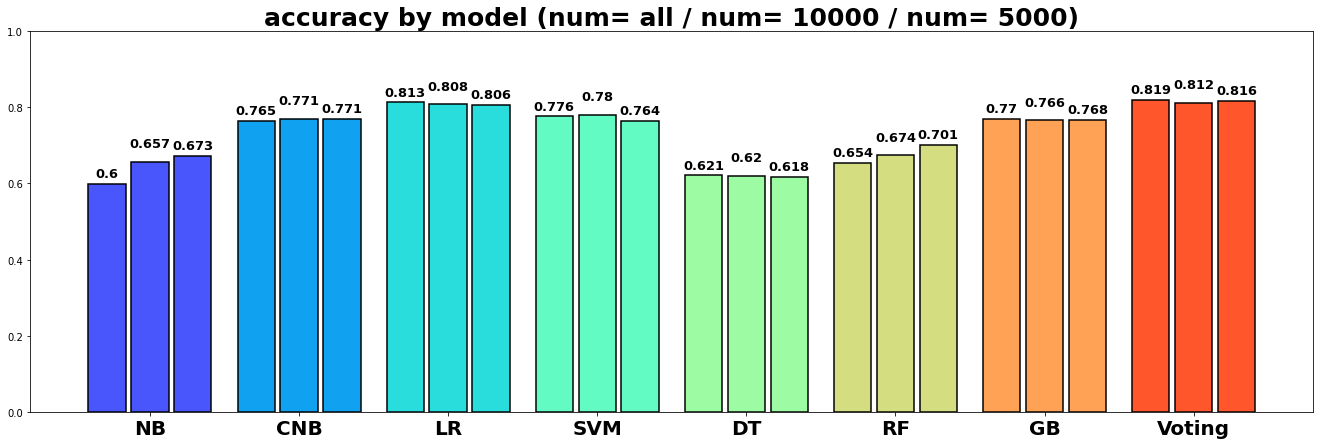

In [ ]:
plt.figure(figsize = (23, 7))

colors = sns.color_palette('rainbow',len(columns))
plt.bar(idx - 1.15*w, graph['num=all'], width = w, color = colors, edgecolor = 'black', linewidth = 1.5 )

for i, v in enumerate(idx - 1.15*w):
    plt.text(v, round(graph['num=all'][i],3)+0.01, round(graph['num=all'][i],3), 
             fontsize = 13, 
             color='black',
             fontweight = 'bold',
             horizontalalignment='center',  
             verticalalignment='bottom')    

colors = sns.color_palette('rainbow',len(columns))
plt.bar(idx, graph['num=10000'], width = w, color = colors, edgecolor = 'black', linewidth = 1.5)
for i, v in enumerate(idx):
    plt.text(v, round(graph['num=10000'][i],3)+0.03, round(graph['num=10000'][i],3), 
             fontsize = 13,
             fontweight = 'bold', 
             color='black',
             horizontalalignment='center',  
             verticalalignment='bottom')    

colors = sns.color_palette('rainbow',len(columns))    
plt.bar(idx + 1.15*w, graph['num=5000'], width = w, color = colors, edgecolor = 'black', linewidth = 1.5)
for i, v in enumerate(idx+ 1.15*w):
    plt.text(v, round(graph['num=5000'][i]+0.01,3), round(graph['num=5000'][i],3), 
             fontsize = 13, 
             fontweight = 'heavy',
             color='black',
             horizontalalignment='center',  
             verticalalignment='bottom')   
    
plt.xticks(idx, columns, fontsize = 20, fontweight = 'bold')
plt.title('accuracy by model (num= all / num= 10000 / num= 5000)', fontsize = 25 , fontweight = 'bold')
plt.ylim(0,1)
plt.show()

모델을 기준으로 했을 떄에는 선형회귀(LR)과 보팅(Voting)이 비슷하고  
그 뒤로 complement NB와 서포트벡터머신(SVM)이 비슷한 수치를 보이고 있다.  
<br>
num_size를 기준으로 하면 대부분의 경우에서 수치를 최대화한 즉, 모두 사용한 모델이 결과값이 가장 좋은 모습을 보이고 있다.

---
# 6. 딥러닝 모델 사용
---

- vectorize_sequence과 to_categorical 2가지 모두 벡터화 하는 것은 같은 방법이나,  
train / test data는 파이썬 리스트의 넘파이 배열이기 때문에 to_categorical 함수를 사용하지 못해 vectorize_sequences를 사용한다. 

In [ ]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from keras import models
from keras import layers
from tensorflow import keras
import tensorflow as tf

- 데이터셋 다시 불러오기

In [ ]:
(train_data_all, train_labels_all), (test_data_all, test_labels_all) = reuters.load_data(num_words=None, test_split=0.2)
(train_data_10, train_labels_10), (test_data_10, test_labels_10) = reuters.load_data(num_words=10000, test_split=0.2)
(train_data_5, train_labels_5), (test_data_5, test_labels_5) = reuters.load_data(num_words=5000, test_split=0.2)

In [ ]:
def vectorize_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
x_train_all = vectorize_sequences(train_data_all, dimension = 31000)
x_test_all = vectorize_sequences(test_data_all, dimension = 31000)

x_train_10 = vectorize_sequences(train_data_10, dimension = 10000)
x_test_10 = vectorize_sequences(test_data_10, dimension = 10000)

x_train_5 = vectorize_sequences(train_data_5, dimension = 5000)
x_test_5 = vectorize_sequences(test_data_5, dimension = 5000)

In [ ]:
# 원핫인코딩을 해줍시다
from keras.utils.np_utils import to_categorical

y_train_all_onehot = to_categorical(train_labels_all)
y_test_all = to_categorical(test_labels_all)

y_train_10_onehot = to_categorical(train_labels_10)
y_test_10 = to_categorical(test_labels_10)

y_train_5_onehot = to_categorical(train_labels_5)
y_test_5 = to_categorical(test_labels_5)

--- 
# 7. 데이터 분리
---

In [ ]:
############################# num_word = None #############################
x_val_all = x_train_all[ : 1000]
x_train_all = x_train_all[1000 : ]

y_val_all = y_train_all_onehot[ : 1000]
y_train_all = y_train_all_onehot[1000 : ]

############################# num_word = 10000 #############################
x_val_10 = x_train_10[ : 1000]
x_train_10 = x_train_10[1000 : ]

y_val_10 = y_train_10_onehot[ : 1000]
y_train_10 = y_train_10_onehot[1000 : ]

############################# num_word = 5000 #############################
x_val_5 = x_train_5[ : 1000]
x_train_5 = x_train_5[1000 : ]

y_val_5 = y_train_5_onehot[ : 1000]
y_train_5 = y_train_5_onehot[1000 : ]

In [ ]:
print(x_train_all.shape)
print(y_train_all.shape)
print(x_test_all.shape)
print(y_test_all.shape)
print(x_val_all.shape)
print(y_val_all.shape)

(7982, 31000)
(7982, 46)
(2246, 31000)
(2246, 46)
(1000, 31000)
(1000, 46)


In [ ]:
print(x_train_10.shape)
print(y_train_10.shape)
print(x_test_10.shape)
print(y_test_10.shape)
print(x_val_10.shape)
print(y_val_10.shape)

(7982, 10000)
(7982, 46)
(2246, 10000)
(2246, 46)
(1000, 10000)
(1000, 46)


In [ ]:
print(x_train_5.shape)
print(y_train_5.shape)
print(x_test_5.shape)
print(y_test_5.shape)
print(x_val_5.shape)
print(y_val_5.shape)

(7982, 5000)
(7982, 46)
(2246, 5000)
(2246, 46)
(1000, 5000)
(1000, 46)


---
### 7-1 모델 reshape
---

- 모델 학습시 shape 문제가 발생하여 이를 해결하기 위해 reshape을 진행하였다.
- 해당 과정에 대한 설명은 마지막 회고부분에 작성 하였다.

In [ ]:
x_train_all = np.reshape(x_train_all,(x_train_all.shape[0], 1, x_train_all.shape[1]))
y_train_all = np.reshape(y_train_all,(y_train_all.shape[0], 1, y_train_all.shape[1]))
x_test_all = np.reshape(x_test_all,(x_test_all.shape[0], 1, x_test_all.shape[1]))
y_test_all = np.reshape(y_test_all,(y_test_all.shape[0], 1, y_test_all.shape[1]))
x_val_all = np.reshape(x_val_all,(x_val_all.shape[0], 1, x_val_all.shape[1]))
y_val_all = np.reshape(y_val_all,(y_val_all.shape[0], 1, y_val_all.shape[1]))


In [ ]:
print(x_train_all.shape)
print(y_train_all.shape)
print(x_test_all.shape)
print(y_test_all.shape)
print(x_val_all.shape)
print(y_val_all.shape)

(7982, 1, 31000)
(7982, 1, 46)
(2246, 1, 31000)
(2246, 1, 46)
(1000, 1, 31000)
(1000, 1, 46)


In [ ]:
x_train_10 = np.reshape(x_train_10,(x_train_10.shape[0], 1, x_train_10.shape[1]))
y_train_10 = np.reshape(y_train_10,(y_train_10.shape[0], 1, y_train_10.shape[1]))
x_test_10 = np.reshape(x_test_10,(x_test_10.shape[0], 1, x_test_10.shape[1]))
y_test_10 = np.reshape(y_test_10,(y_test_10.shape[0], 1, y_test_10.shape[1]))
x_val_10 = np.reshape(x_val_10,(x_val_10.shape[0], 1, x_val_10.shape[1]))
y_val_10 = np.reshape(y_val_10,(y_val_10.shape[0], 1, y_val_10.shape[1]))


In [ ]:
print(x_train_10.shape)
print(y_train_10.shape)
print(x_test_10.shape)
print(y_test_10.shape)
print(x_val_10.shape)
print(y_val_10.shape)

(7982, 1, 10000)
(7982, 1, 46)
(2246, 1, 10000)
(2246, 1, 46)
(1000, 1, 10000)
(1000, 1, 46)


In [ ]:
x_train_5 = np.reshape(x_train_5,(x_train_5.shape[0], 1, x_train_5.shape[1]))
y_train_5 = np.reshape(y_train_5,(y_train_5.shape[0], 1, y_train_5.shape[1]))
x_test_5 = np.reshape(x_test_5,(x_test_5.shape[0], 1, x_test_5.shape[1]))
y_test_5 = np.reshape(y_test_5,(y_test_5.shape[0], 1, y_test_5.shape[1]))
x_val_5 = np.reshape(x_val_5,(x_val_5.shape[0], 1, x_val_5.shape[1]))
y_val_5 = np.reshape(y_val_5,(y_val_5.shape[0], 1, y_val_5.shape[1]))


In [ ]:
print(x_train_5.shape)
print(y_train_5.shape)
print(x_test_5.shape)
print(y_test_5.shape)
print(x_val_5.shape)
print(y_val_5.shape)

(7982, 1, 5000)
(7982, 1, 46)
(2246, 1, 5000)
(2246, 1, 46)
(1000, 1, 5000)
(1000, 1, 46)


---
# 8. 딥러닝 모델 생성
---

---
### 8-1 LSTM - all
---

In [ ]:
# 모델 생성
LSTM_model_all = models.Sequential()
LSTM_model_all.add(keras.layers.LSTM(128,return_sequences=True, input_shape=(1,31000,)))
LSTM_model_all.add(keras.layers.LSTM(64,return_sequences=True))
LSTM_model_all.add(layers.Dense(46, activation='softmax')) # 클래스가 46개

LSTM_model_all.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            15938048  
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             49408     
                                                                 
 dense (Dense)               (None, 1, 46)             2990      
                                                                 
Total params: 15,990,446
Trainable params: 15,990,446
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LSTM_model_all.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

LSTM_history_all = LSTM_model_all.fit(x_train_all, y_train_all,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_test_all, y_test_all),
                    verbose=1)

Epoch 1/20
32/32 [==============================] - 5s 57ms/step - loss: 3.1874 - accuracy: 0.4389 - val_loss: 2.2609 - val_accuracy: 0.5272
Epoch 2/20
32/32 [==============================] - 1s 24ms/step - loss: 1.8119 - accuracy: 0.5837 - val_loss: 1.5577 - val_accuracy: 0.6581
Epoch 3/20
32/32 [==============================] - 1s 23ms/step - loss: 1.2585 - accuracy: 0.7172 - val_loss: 1.2741 - val_accuracy: 0.7035
Epoch 4/20
32/32 [==============================] - 1s 24ms/step - loss: 0.9035 - accuracy: 0.8077 - val_loss: 1.1087 - val_accuracy: 0.7605
Epoch 5/20
32/32 [==============================] - 1s 23ms/step - loss: 0.6421 - accuracy: 0.8832 - val_loss: 1.0283 - val_accuracy: 0.7774
Epoch 6/20
32/32 [==============================] - 1s 23ms/step - loss: 0.4621 - accuracy: 0.9250 - val_loss: 0.9855 - val_accuracy: 0.7850
Epoch 7/20
32/32 [==============================] - 1s 24ms/step - loss: 0.3455 - accuracy: 0.9399 - val_loss: 0.9688 - val_accuracy: 0.7894
Epoch 8/20
32

In [ ]:
# 모델 평가
print('num_word = None 의 정확도 : {:.3f}'.format(LSTM_model_all.evaluate(x_val_all, y_val_all)[1]))

32/32 [==============================] - 0s 5ms/step - loss: 0.9431 - accuracy: 0.8080
num_word = None 의 정확도 : 0.808


---
### 8-2 LSTM - 10000
---

In [ ]:
# 모델 생성
LSTM_model_10 = models.Sequential()
LSTM_model_10.add(keras.layers.LSTM(128,return_sequences=True, input_shape=(1,10000,)))
LSTM_model_10.add(keras.layers.LSTM(64,return_sequences=True))
LSTM_model_10.add(layers.Dense(46, activation='softmax')) # 클래스가 46개

LSTM_model_10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 128)            5186048   
                                                                 
 lstm_3 (LSTM)               (None, 1, 64)             49408     
                                                                 
 dense_1 (Dense)             (None, 1, 46)             2990      
                                                                 
Total params: 5,238,446
Trainable params: 5,238,446
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LSTM_model_10.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

LSTM_history_10 = LSTM_model_10.fit(x_train_10, y_train_10,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_test_10, y_test_10),
                    verbose=1)

Epoch 1/20
32/32 [==============================] - 3s 34ms/step - loss: 3.1790 - accuracy: 0.3879 - val_loss: 2.2546 - val_accuracy: 0.5352
Epoch 2/20
32/32 [==============================] - 0s 11ms/step - loss: 1.8054 - accuracy: 0.5876 - val_loss: 1.5562 - val_accuracy: 0.6607
Epoch 3/20
32/32 [==============================] - 0s 11ms/step - loss: 1.2898 - accuracy: 0.7121 - val_loss: 1.2734 - val_accuracy: 0.7017
Epoch 4/20
32/32 [==============================] - 0s 11ms/step - loss: 0.9641 - accuracy: 0.7809 - val_loss: 1.1086 - val_accuracy: 0.7480
Epoch 5/20
32/32 [==============================] - 0s 11ms/step - loss: 0.7196 - accuracy: 0.8532 - val_loss: 1.0054 - val_accuracy: 0.7734
Epoch 6/20
32/32 [==============================] - 0s 11ms/step - loss: 0.5355 - accuracy: 0.9030 - val_loss: 0.9460 - val_accuracy: 0.7867
Epoch 7/20
32/32 [==============================] - 0s 11ms/step - loss: 0.4029 - accuracy: 0.9272 - val_loss: 0.9172 - val_accuracy: 0.7898
Epoch 8/20
32

In [ ]:
# 모델 평가
print('num_word = 10000 의 정확도 : {:.3f}'.format(LSTM_model_10.evaluate(x_val_10, y_val_10)[1]))

32/32 [==============================] - 0s 4ms/step - loss: 0.9076 - accuracy: 0.8140
num_word = 10000 의 정확도 : 0.814


---
### 8-3 LSTM - 5000
---

In [ ]:
# 모델 생성
LSTM_model_5 = models.Sequential()
LSTM_model_5.add(keras.layers.LSTM(128,return_sequences=True, input_shape=(1,5000,)))
LSTM_model_5.add(keras.layers.LSTM(64,return_sequences=True))
LSTM_model_5.add(layers.Dense(46, activation='softmax')) # 클래스가 46개

LSTM_model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 128)            2626048   
                                                                 
 lstm_5 (LSTM)               (None, 1, 64)             49408     
                                                                 
 dense_2 (Dense)             (None, 1, 46)             2990      
                                                                 
Total params: 2,678,446
Trainable params: 2,678,446
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LSTM_model_5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

LSTM_history_5 = LSTM_model_5.fit(x_train_5, y_train_5,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_test_5, y_test_5),
                    verbose=1)

Epoch 1/20
32/32 [==============================] - 4s 32ms/step - loss: 3.2062 - accuracy: 0.4202 - val_loss: 2.3652 - val_accuracy: 0.5347
Epoch 2/20
32/32 [==============================] - 0s 8ms/step - loss: 1.8977 - accuracy: 0.5752 - val_loss: 1.6022 - val_accuracy: 0.6443
Epoch 3/20
32/32 [==============================] - 0s 8ms/step - loss: 1.3503 - accuracy: 0.7055 - val_loss: 1.2871 - val_accuracy: 0.6986
Epoch 4/20
32/32 [==============================] - 0s 8ms/step - loss: 1.0279 - accuracy: 0.7681 - val_loss: 1.1116 - val_accuracy: 0.7458
Epoch 5/20
32/32 [==============================] - 0s 8ms/step - loss: 0.7813 - accuracy: 0.8355 - val_loss: 1.0039 - val_accuracy: 0.7689
Epoch 6/20
32/32 [==============================] - 0s 8ms/step - loss: 0.5952 - accuracy: 0.8817 - val_loss: 0.9386 - val_accuracy: 0.7841
Epoch 7/20
32/32 [==============================] - 0s 8ms/step - loss: 0.4600 - accuracy: 0.9141 - val_loss: 0.9125 - val_accuracy: 0.7912
Epoch 8/20
32/32 [=

In [ ]:
# 모델 평가
print('num_word = 5000 의 정확도 : {:.3f}'.format(LSTM_model_5.evaluate(x_val_5, y_val_5)[1]))

32/32 [==============================] - 0s 3ms/step - loss: 0.8990 - accuracy: 0.8100
num_word = 5000 의 정확도 : 0.810


평가 데이터수치를 기준으로 할 경우 이전 머신러닝 모델들과는 다르게  
0.812로 단어장 크기가 가장 작은 num_word = 5000의 경우가 가장 높은 정확도를 보였다. 

모델학습 과정에서 사용하는 검증 데이터셋을 기준으로 하였을 경우에는   
3가지 모델 중 첫 번째 모델인 num_word = None 의 경우가 가장 높은 점수를 보였다. 

---
### 8-4 시각화
---

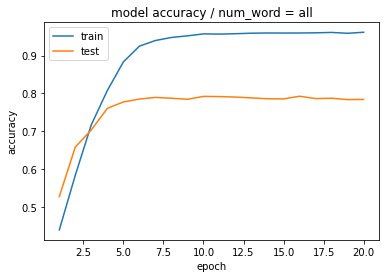

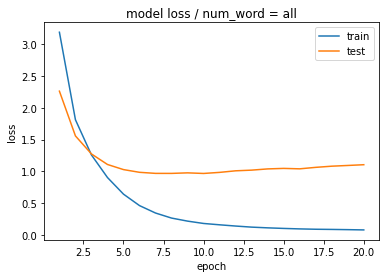

In [ ]:
epochs = range(1, len(LSTM_history_all.history['accuracy']) + 1)
plt.plot(epochs, LSTM_history_all.history['accuracy'])
plt.plot(epochs, LSTM_history_all.history['val_accuracy'])
plt.title('model accuracy / num_word = all')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

epochs = range(1, len(LSTM_history_all.history['accuracy']) + 1)
plt.plot(epochs, LSTM_history_all.history['loss'])
plt.plot(epochs, LSTM_history_all.history['val_loss'])
plt.title('model loss / num_word = all')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

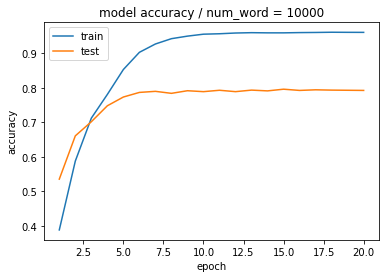

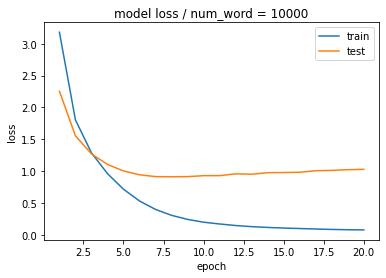

In [ ]:
epochs = range(1, len(LSTM_history_10.history['accuracy']) + 1)
plt.plot(epochs, LSTM_history_10.history['accuracy'])
plt.plot(epochs, LSTM_history_10.history['val_accuracy'])
plt.title('model accuracy / num_word = 10000')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

epochs = range(1, len(LSTM_history_10.history['accuracy']) + 1)
plt.plot(epochs, LSTM_history_10.history['loss'])
plt.plot(epochs, LSTM_history_10.history['val_loss'])
plt.title('model loss / num_word = 10000')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

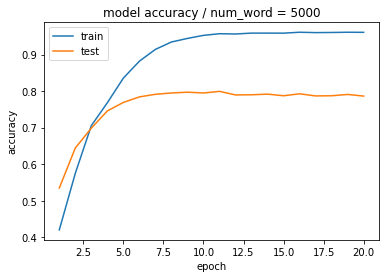

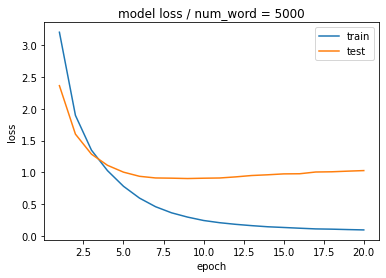

In [ ]:
epochs = range(1, len(LSTM_history_5.history['accuracy']) + 1)
plt.plot(epochs, LSTM_history_5.history['accuracy'])
plt.plot(epochs, LSTM_history_5.history['val_accuracy'])
plt.title('model accuracy / num_word = 5000')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

epochs = range(1, len(LSTM_history_5.history['accuracy']) + 1)
plt.plot(epochs, LSTM_history_5.history['loss'])
plt.plot(epochs, LSTM_history_5.history['val_loss'])
plt.title('model loss / num_word = 5000')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

그래프에서 train과 test값이 한 곳으로 수렴하지 않는 것은 과적합의 문제가 있을 수 있다고 생각한다. 

---
### 8-5 conv1D - all
---

In [ ]:
# 모델 생성

cov_model_all = keras.Sequential()
cov_model_all.add(tf.keras.layers.Conv1D(256, 32, activation='relu', input_shape=(1,31000,), data_format='channels_first'))
cov_model_all.add(tf.keras.layers.MaxPooling1D(6))
cov_model_all.add(tf.keras.layers.Dropout(0.3))

cov_model_all.add(tf.keras.layers.Conv1D(128, 32, activation='relu'))
cov_model_all.add(tf.keras.layers.MaxPooling1D(6))
cov_model_all.add(tf.keras.layers.Dropout(0.3))
cov_model_all.add(tf.keras.layers.Dense(46, activation='softmax'))

cov_model_all.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 256, 30969)        8448      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 42, 30969)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 42, 30969)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 128)           126849152 
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 1, 128)           

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=0, mode='auto')

In [ ]:
cov_model_all.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cov_history_all = cov_model_all.fit(x_train_all, y_train_all,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_test_all, y_test_all),
                    verbose=1,
                    callbacks = [early_stopping])

Epoch 1/20
250/250 [==============================] - 84s 329ms/step - loss: 1.7198 - accuracy: 0.5876 - val_loss: 1.1450 - val_accuracy: 0.7271
Epoch 2/20
250/250 [==============================] - 81s 322ms/step - loss: 0.7129 - accuracy: 0.8300 - val_loss: 1.0468 - val_accuracy: 0.7756
Epoch 3/20
250/250 [==============================] - 81s 323ms/step - loss: 0.3885 - accuracy: 0.9088 - val_loss: 1.0521 - val_accuracy: 0.7841
Epoch 4/20
250/250 [==============================] - 81s 323ms/step - loss: 0.2993 - accuracy: 0.9334 - val_loss: 1.0850 - val_accuracy: 0.7809


In [ ]:
# 모델 평가
print('num_word = None 의 정확도 : {:.3f}'.format(cov_model_all.evaluate(x_val_all, y_val_all)[1]))

32/32 [==============================] - 4s 127ms/step - loss: 0.9094 - accuracy: 0.8020
num_word = None 의 정확도 : 0.802


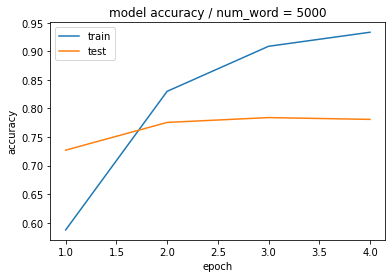

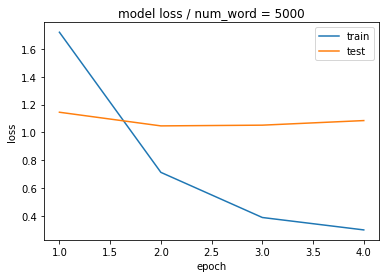

In [ ]:
epochs = range(1, len(cov_history_all.history['accuracy']) + 1)
plt.plot(epochs, cov_history_all.history['accuracy'])
plt.plot(epochs, cov_history_all.history['val_accuracy'])
plt.title('model accuracy / num_word = 5000')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

epochs = range(1, len(cov_history_all.history['accuracy']) + 1)
plt.plot(epochs, cov_history_all.history['loss'])
plt.plot(epochs, cov_history_all.history['val_loss'])
plt.title('model loss / num_word = 5000')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

---
### 8-6 conv1D - 10000
---

In [ ]:
# 모델 생성

cov_model_10 = keras.Sequential()
cov_model_10.add(tf.keras.layers.Conv1D(256, 32, activation='relu', input_shape=(1,10000,), data_format='channels_first'))
cov_model_10.add(tf.keras.layers.MaxPooling1D(6))
cov_model_10.add(tf.keras.layers.Dropout(0.3))

cov_model_10.add(tf.keras.layers.Conv1D(128, 32, activation='relu'))
cov_model_10.add(tf.keras.layers.MaxPooling1D(6))
cov_model_10.add(tf.keras.layers.Dropout(0.3))
cov_model_10.add(tf.keras.layers.Dense(46, activation='softmax'))

cov_model_10.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 256, 9969)         8448      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 42, 9969)         0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 42, 9969)          0         
                                                                 
 conv1d_3 (Conv1D)           (None, 11, 128)           40833152  
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 1, 128)           

In [ ]:
cov_model_10.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cov_history_10 = cov_model_10.fit(x_train_10, y_train_10,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_test_10, y_test_10),
                    verbose=1,
                    callbacks = [early_stopping])

Epoch 1/20
250/250 [==============================] - 28s 109ms/step - loss: 1.7667 - accuracy: 0.5732 - val_loss: 1.1376 - val_accuracy: 0.7373
Epoch 2/20
250/250 [==============================] - 27s 107ms/step - loss: 0.8284 - accuracy: 0.7979 - val_loss: 0.9788 - val_accuracy: 0.7760
Epoch 3/20
250/250 [==============================] - 27s 107ms/step - loss: 0.4832 - accuracy: 0.8820 - val_loss: 0.9986 - val_accuracy: 0.7912
Epoch 4/20
250/250 [==============================] - 27s 107ms/step - loss: 0.3464 - accuracy: 0.9147 - val_loss: 1.0856 - val_accuracy: 0.7876


In [ ]:
# 모델 평가
print('num_word = 10000 의 정확도 : {:.3f}'.format(cov_model_10.evaluate(x_val_10, y_val_10)[1]))

32/32 [==============================] - 1s 37ms/step - loss: 0.9430 - accuracy: 0.8150
num_word = 10000 의 정확도 : 0.815


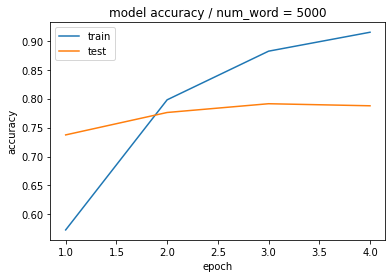

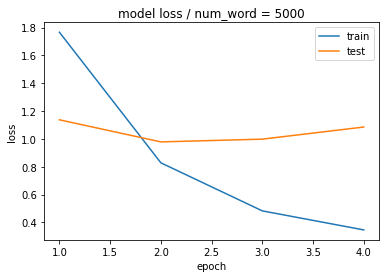

In [ ]:
epochs = range(1, len(cov_history_10.history['accuracy']) + 1)
plt.plot(epochs, cov_history_10.history['accuracy'])
plt.plot(epochs, cov_history_10.history['val_accuracy'])
plt.title('model accuracy / num_word = 5000')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

epochs = range(1, len(cov_history_10.history['accuracy']) + 1)
plt.plot(epochs, cov_history_10.history['loss'])
plt.plot(epochs, cov_history_10.history['val_loss'])
plt.title('model loss / num_word = 5000')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

---
### 8-7 conv1D - 5000
---

In [ ]:
# 모델 생성

cov_model_5 = keras.Sequential()
cov_model_5.add(tf.keras.layers.Conv1D(256, 32, activation='relu', input_shape=(1,5000,), data_format='channels_first'))
cov_model_5.add(tf.keras.layers.MaxPooling1D(6))
cov_model_5.add(tf.keras.layers.Dropout(0.3))

cov_model_5.add(tf.keras.layers.Conv1D(128, 32, activation='relu'))
cov_model_5.add(tf.keras.layers.MaxPooling1D(6))
cov_model_5.add(tf.keras.layers.Dropout(0.3))
cov_model_5.add(tf.keras.layers.Dense(46, activation='softmax'))

cov_model_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 256, 4969)         8448      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 42, 4969)         0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 42, 4969)          0         
                                                                 
 conv1d_5 (Conv1D)           (None, 11, 128)           20353152  
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 1, 128)           

In [ ]:
cov_model_5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cov_history_5 = cov_model_5.fit(x_train_5, y_train_5,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_test_5, y_test_5),
                    verbose=1,
                    callbacks = [early_stopping])

Epoch 1/20
250/250 [==============================] - 15s 56ms/step - loss: 1.7241 - accuracy: 0.5884 - val_loss: 1.1398 - val_accuracy: 0.7311
Epoch 2/20
250/250 [==============================] - 13s 54ms/step - loss: 0.8160 - accuracy: 0.8048 - val_loss: 0.9264 - val_accuracy: 0.7881
Epoch 3/20
250/250 [==============================] - 14s 56ms/step - loss: 0.4743 - accuracy: 0.8819 - val_loss: 0.9639 - val_accuracy: 0.7970
Epoch 4/20
250/250 [==============================] - 13s 54ms/step - loss: 0.3229 - accuracy: 0.9192 - val_loss: 1.1100 - val_accuracy: 0.7881


In [ ]:
# 모델 평가
print('num_word = 5000 의 정확도 : {:.3f}'.format(cov_model_5.evaluate(x_val_5, y_val_5)[1]))

32/32 [==============================] - 1s 22ms/step - loss: 0.9267 - accuracy: 0.8180
num_word = 5000 의 정확도 : 0.818


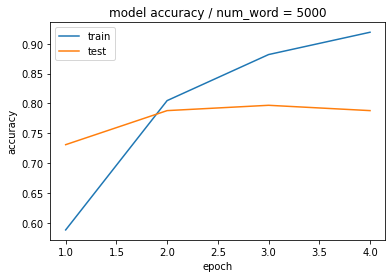

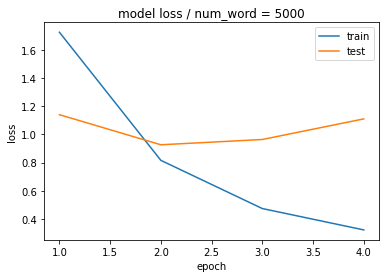

In [ ]:
epochs = range(1, len(cov_history_5.history['accuracy']) + 1)
plt.plot(epochs, cov_history_5.history['accuracy'])
plt.plot(epochs, cov_history_5.history['val_accuracy'])
plt.title('model accuracy / num_word = 5000')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

epochs = range(1, len(cov_history_5.history['accuracy']) + 1)
plt.plot(epochs, cov_history_5.history['loss'])
plt.plot(epochs, cov_history_5.history['val_loss'])
plt.title('model loss / num_word = 5000')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

|분류|모델명|정확도|
|:--:|:--:|:--:|
|All|LSTM|0.808|
|10000|LSTM|0.814|
|5000|LSTM|0.810|
| | | |
|All|Conv1D|0.802|
|10000|Conv1D|0.815|
|5000|Conv1D|0.818|

딥러닝 모델에서는 정확도를 기준으로 할때,  
LSTM 모델은 10000이 가장 높은 정확도를 보여주며  
Conv1D 모델은 5000이 가장 높은 정확도를 보여준다.

---
# 9. 모델 레이어 변경
---

- LSTM 모델의 학습 시간이 얼마 안걸리기 때문에 Layer 변경을 통해서 정확도의 수치의 변화시켜 보려한다.

- 모델의 기준은 LSTM - 5000을 기준으로 할 예정이다.

---
### 9-1 Layer 단순화
---

- 기존 LSTM 2층 + Dense 1층으로 이루어진 모델을 
- LSTM 1층 + Dense 2층으로 단순화 시켜서 확인해보겠다.

In [ ]:
# 모델 생성
LSTM_model2_5 = models.Sequential()
LSTM_model2_5.add(keras.layers.LSTM(128,return_sequences=True, input_shape=(1,5000,)))
LSTM_model2_5.add(layers.Dense(64, activation='relu'))
LSTM_model2_5.add(layers.Dense(46, activation='softmax')) # 클래스가 46개

LSTM_model2_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1, 128)            2626048   
                                                                 
 dense_2 (Dense)             (None, 1, 64)             8256      
                                                                 
 dense_3 (Dense)             (None, 1, 46)             2990      
                                                                 
Total params: 2,637,294
Trainable params: 2,637,294
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LSTM_model2_5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

LSTM_history2_5 = LSTM_model2_5.fit(x_train_5, y_train_5,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_test_5, y_test_5),
                    verbose=1)

Epoch 1/20
32/32 [==============================] - 7s 28ms/step - loss: 2.7900 - accuracy: 0.4364 - val_loss: 1.7864 - val_accuracy: 0.6060
Epoch 2/20
32/32 [==============================] - 0s 9ms/step - loss: 1.4269 - accuracy: 0.6883 - val_loss: 1.2903 - val_accuracy: 0.7079
Epoch 3/20
32/32 [==============================] - 0s 9ms/step - loss: 0.9900 - accuracy: 0.7823 - val_loss: 1.0868 - val_accuracy: 0.7551
Epoch 4/20
32/32 [==============================] - 0s 9ms/step - loss: 0.7049 - accuracy: 0.8453 - val_loss: 0.9692 - val_accuracy: 0.7796
Epoch 5/20
32/32 [==============================] - 0s 9ms/step - loss: 0.4855 - accuracy: 0.8991 - val_loss: 0.8949 - val_accuracy: 0.7921
Epoch 6/20
32/32 [==============================] - 0s 9ms/step - loss: 0.3300 - accuracy: 0.9336 - val_loss: 0.8872 - val_accuracy: 0.7921
Epoch 7/20
32/32 [==============================] - 0s 9ms/step - loss: 0.2429 - accuracy: 0.9439 - val_loss: 0.8931 - val_accuracy: 0.8001
Epoch 8/20
32/32 [=

In [ ]:
# 모델 평가
print('num_word = 5000 의 정확도 : {:.3f}'.format(LSTM_model2_5.evaluate(x_val_5, y_val_5)[1]))

32/32 [==============================] - 0s 4ms/step - loss: 1.0444 - accuracy: 0.8040
num_word = 5000 의 정확도 : 0.804


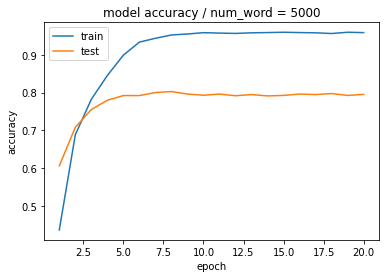

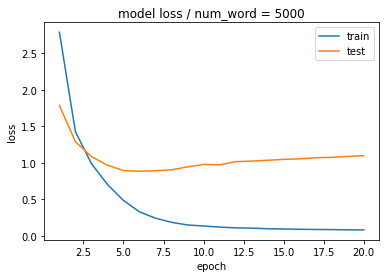

In [ ]:
epochs = range(1, len(LSTM_history2_5.history['accuracy']) + 1)
plt.plot(epochs, LSTM_history2_5.history['accuracy'])
plt.plot(epochs, LSTM_history2_5.history['val_accuracy'])
plt.title('model accuracy / num_word = 5000')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

epochs = range(1, len(LSTM_history2_5.history['accuracy']) + 1)
plt.plot(epochs, LSTM_history2_5.history['loss'])
plt.plot(epochs, LSTM_history2_5.history['val_loss'])
plt.title('model loss / num_word = 5000')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

이전과 크게 달라진 것이 없는 것 처럼 보인다.  
정확도 수치 또한 0.006정도 밖에 차이가 나지 않는다.

---
### 9-2 LSTM층을 더 줄인다면?
---

- 이전 9-1 모델에서 LSTM층을 없애고 Dense층으로만 이루어진 모델을 만들고 학습시켜 보겠다.

In [ ]:
# 모델 생성
LSTM_model3_5 = models.Sequential()
LSTM_model3_5.add(layers.Dense(128, activation='relu', input_shape=(1,5000,)))
LSTM_model3_5.add(layers.Dense(64, activation='relu'))
LSTM_model3_5.add(layers.Dense(46, activation='softmax')) # 클래스가 46개

LSTM_model3_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1, 128)            640128    
                                                                 
 dense_8 (Dense)             (None, 1, 64)             8256      
                                                                 
 dense_9 (Dense)             (None, 1, 46)             2990      
                                                                 
Total params: 651,374
Trainable params: 651,374
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LSTM_model3_5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

LSTM_history3_5 = LSTM_model3_5.fit(x_train_5, y_train_5,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_test_5, y_test_5),
                    verbose=1)

Epoch 1/20
32/32 [==============================] - 1s 18ms/step - loss: 2.5216 - accuracy: 0.5104 - val_loss: 1.5766 - val_accuracy: 0.6634
Epoch 2/20
32/32 [==============================] - 0s 10ms/step - loss: 1.2356 - accuracy: 0.7293 - val_loss: 1.2041 - val_accuracy: 0.7378
Epoch 3/20
32/32 [==============================] - 0s 12ms/step - loss: 0.8540 - accuracy: 0.8135 - val_loss: 1.0311 - val_accuracy: 0.7707
Epoch 4/20
32/32 [==============================] - 0s 11ms/step - loss: 0.5861 - accuracy: 0.8737 - val_loss: 0.9463 - val_accuracy: 0.7907
Epoch 5/20
32/32 [==============================] - 0s 12ms/step - loss: 0.4031 - accuracy: 0.9158 - val_loss: 0.9308 - val_accuracy: 0.7907
Epoch 6/20
32/32 [==============================] - 0s 14ms/step - loss: 0.2903 - accuracy: 0.9362 - val_loss: 0.9298 - val_accuracy: 0.7974
Epoch 7/20
32/32 [==============================] - 0s 9ms/step - loss: 0.2244 - accuracy: 0.9460 - val_loss: 0.9854 - val_accuracy: 0.7903
Epoch 8/20
32/

In [ ]:
# 모델 평가
print('num_word = 5000 의 정확도 : {:.3f}'.format(LSTM_model3_5.evaluate(x_val_5, y_val_5)[1]))

32/32 [==============================] - 0s 4ms/step - loss: 1.0557 - accuracy: 0.8100
num_word = 5000 의 정확도 : 0.810


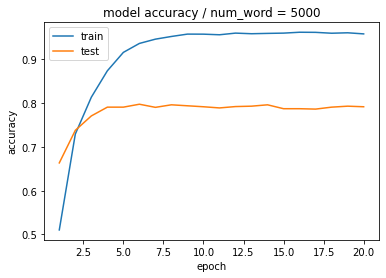

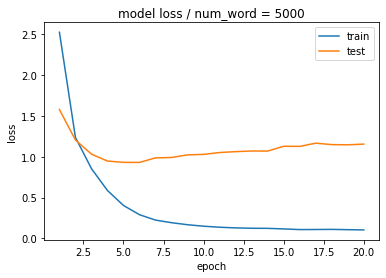

In [ ]:
epochs = range(1, len(LSTM_history3_5.history['accuracy']) + 1)
plt.plot(epochs, LSTM_history3_5.history['accuracy'])
plt.plot(epochs, LSTM_history3_5.history['val_accuracy'])
plt.title('model accuracy / num_word = 5000')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

epochs = range(1, len(LSTM_history3_5.history['accuracy']) + 1)
plt.plot(epochs, LSTM_history3_5.history['loss'])
plt.plot(epochs, LSTM_history3_5.history['val_loss'])
plt.title('model loss / num_word = 5000')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

정확도 수치는 기존 8-3과 동일하나  
그래프를 보면 train과 test의 격차가 더 벌어지는 오버피팅이 일어나는 것 처럼 보인다.

----
### 9-3 모델 깊게 쌓기
---

- LSTM층을 3층으로 쌓아 이전 보다 모델을 깊게 만들고 수치를 확인해 보겠다.

In [ ]:
# 모델 생성
LSTM_model4_5 = models.Sequential()
LSTM_model4_5.add(keras.layers.LSTM(256,return_sequences=True, input_shape=(1,5000,)))
LSTM_model4_5.add(keras.layers.LSTM(128,return_sequences=True))
LSTM_model4_5.add(keras.layers.LSTM(64,return_sequences=True))
LSTM_model4_5.add(layers.Dense(46, activation='softmax')) # 클래스가 46개

LSTM_model4_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 256)            5383168   
                                                                 
 lstm_3 (LSTM)               (None, 1, 128)            197120    
                                                                 
 lstm_4 (LSTM)               (None, 1, 64)             49408     
                                                                 
 dense_10 (Dense)            (None, 1, 46)             2990      
                                                                 
Total params: 5,632,686
Trainable params: 5,632,686
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LSTM_model4_5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

LSTM_history4_5 = LSTM_model4_5.fit(x_train_5, y_train_5,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_test_5, y_test_5),
                    verbose=1)

Epoch 1/20
32/32 [==============================] - 7s 62ms/step - loss: 3.1829 - accuracy: 0.3460 - val_loss: 2.4731 - val_accuracy: 0.3620
Epoch 2/20
32/32 [==============================] - 0s 12ms/step - loss: 2.3103 - accuracy: 0.3657 - val_loss: 2.0045 - val_accuracy: 0.5036
Epoch 3/20
32/32 [==============================] - 0s 12ms/step - loss: 1.7782 - accuracy: 0.5332 - val_loss: 1.6366 - val_accuracy: 0.5837
Epoch 4/20
32/32 [==============================] - 0s 12ms/step - loss: 1.5012 - accuracy: 0.6123 - val_loss: 1.5205 - val_accuracy: 0.6273
Epoch 5/20
32/32 [==============================] - 0s 12ms/step - loss: 1.2897 - accuracy: 0.6943 - val_loss: 1.3766 - val_accuracy: 0.6790
Epoch 6/20
32/32 [==============================] - 0s 12ms/step - loss: 1.0597 - accuracy: 0.7474 - val_loss: 1.2799 - val_accuracy: 0.7044
Epoch 7/20
32/32 [==============================] - 0s 12ms/step - loss: 0.8704 - accuracy: 0.8046 - val_loss: 1.2263 - val_accuracy: 0.7289
Epoch 8/20
32

In [ ]:
# 모델 평가
print('num_word = 5000 의 정확도 : {:.3f}'.format(LSTM_model4_5.evaluate(x_val_5, y_val_5)[1]))

32/32 [==============================] - 0s 5ms/step - loss: 1.0634 - accuracy: 0.7810
num_word = 5000 의 정확도 : 0.781


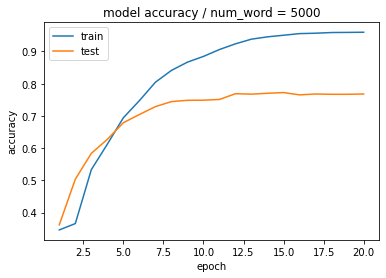

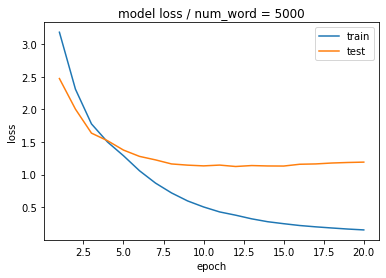

In [ ]:
epochs = range(1, len(LSTM_history4_5.history['accuracy']) + 1)
plt.plot(epochs, LSTM_history4_5.history['accuracy'])
plt.plot(epochs, LSTM_history4_5.history['val_accuracy'])
plt.title('model accuracy / num_word = 5000')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

epochs = range(1, len(LSTM_history4_5.history['accuracy']) + 1)
plt.plot(epochs, LSTM_history4_5.history['loss'])
plt.plot(epochs, LSTM_history4_5.history['val_loss'])
plt.title('model loss / num_word = 5000')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

정확도의 값이 더 떨어졌으며, 이전 값에서 별다른 개선 사항이 보이지 않는다.

---
# 10. 회고
---

- 모델 Layer의 개수에 따라 언더피팅과 오버피팅 사이에서 왔다 갔다 하는 것 처럼 생각된다.  
- 역시나 적절한 값을 찾는 것은 매우 어려운 일이다.
- 딥러닝을 학습하고 있지만 경우에 따라서 머신러닝 모델의 성능이 더 높은 경우도 있으며,
- 2가지 사이에서 적절하게 사용하는 것이 중요할 것 이다.

-----
### Shape 문제
- 딥러닝 모델을 사용함에 있어서 새로 데이터셋을 불러와서 다시 전처리를 진행하였다. 
- 전처리를 진행하면서 vectorize_sequences와 to_categorical를 통해 벡터화를 진행하였다. 

- 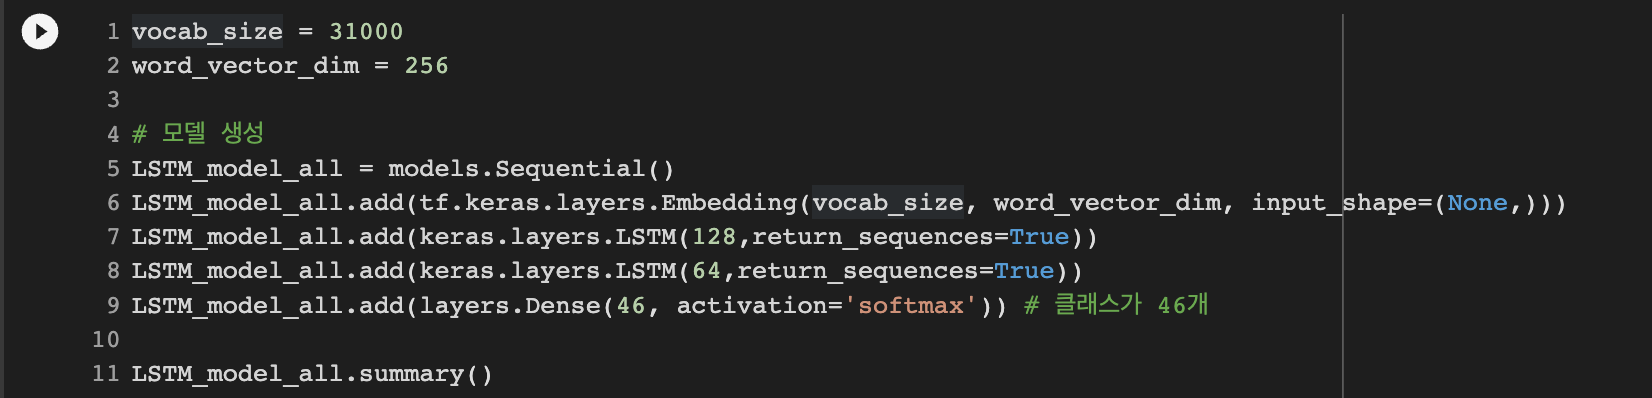

- 모델을 구성하는 초기에, LSTM층 이전에 embedding층을 쌓았고 해당 모델을 학습하려 하면,  
>**'Shapes (None, 46) and (None, 31000, 46) are incompatible'**    

  이와 같은 오류가 발생하였다.
<br><br>
- 원인을 고민해본 결과 마지막 층에는 (1,46)의 형태로 결과값을 예측하는 방식이지만,  
Layer에 input_shaep을 (31000,)으로 고정을 시켜놨기 때문에 shape이 안맞는 문제가 발생한 것 같다. <br><br>

- 하여, embedding Layer를 제거하고 모델을 학습하니 다시  
>**'expected ndim=3, found ndim=2. Full shape received: (None, 10000)'** 

  오류가 발생하였다. <br><br>

- 인터넷을 찾아본 결과 reshape을 해주면 오류가 해결된다고 하는 것을 알게되었고, 그로인해 7-1의 과정 (7982,10000) -> (7982,1,10000)으로 데이터셋을 reshape을 하고, Input_shape=(1,31000)을 넣어 해결하였다. 

- 결과적으로, 이전의 모델 학습 데이터셋의 shpae은 x값과 y값의 차원이 동일 했으나, 이번의 경우 2개의 차원이 맞지 않았다. 
> x_train_all -> (7982,31000)  
y_train_all -> (7982,46)

  차원을 맞춰주기 위해 reshape을 진행하면 해결이 된다.
 

-------
### Out Of Memory 문제 
- conv1d 모델에서 배치가 256으로 올렸을 때,  
>**If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.  [Op:__inference_train_function_149630]**

  과 같은 에러가 발생 하였다.

- 해당 에러는 GPU 메모리 부족 문제로 보통 batch_size를 조절하는 부분으로 문제 해결이 가능하거나,  
런타임에 메모리를 할당하는 방식 변경을 통해 해결이 가능하다고 한다.   
https://twinparadox.tistory.com/606

- 그렇다면 GPU 메모리가 batch_size와 어떤 연관이 있는가?   
딥러닝 학습에서 GPU를 사용하는 이유는 수많은 행렬 연산을 한번에 처리하기 위함이다.  
즉, 메모리에 모델, 데이터, 가중치값, 퍼셉트론의 에러값등을 올려놓고 있어야 학습이 가능하다.  
batch_size가 256이라는 것은 메모리의 양이 대략 256배 늘어나는 것으로 이해하면 되며,  
메모리의 양이 그래픽 카드 메모리 보다 클경우 OOM(out of memory)에러를 발생 시킨다고 한다.